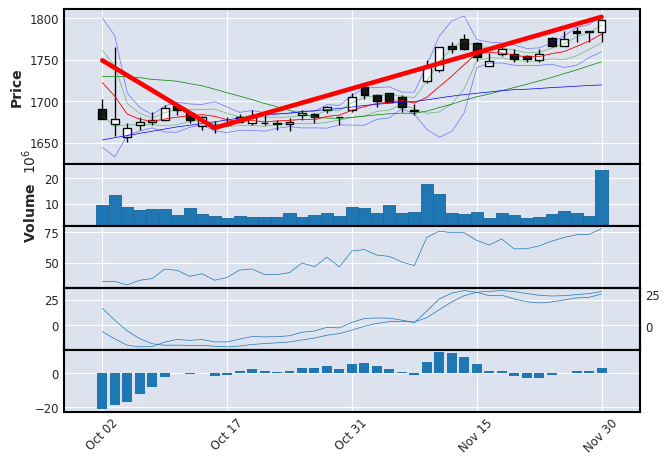

In [3]:
from screener.models.analyzer import Analyzer
from screener.repository.history import History
import mplfinance as mpf

h = History()
a = Analyzer(h.get_history(9434))

a.add_sma(5) \
    .add_sma(20) \
    .add_sma(50) \
    .add_rsi(10, 'rsi') \
    .add_macd(5, 20, 5, 'macd') \
    .add_bb(5, 'bb') \
    .add_zigzag(0.02)

df = a.df['2023-10-01':'2023-11-30']

series = [
    mpf.make_addplot(df['sma05'], color='red', width=0.5),
    mpf.make_addplot(df['sma20'], color='green', width=0.5),
    mpf.make_addplot(df['sma50'], color='blue', width=0.5),

    # mpf.make_addplot(df['Volume'], panel = 1, width = 0.5),

    mpf.make_addplot(df['rsi'], panel = 2, width = 0.5),
    mpf.make_addplot(df['macd'], panel = 3, width = 0.5),
    mpf.make_addplot(df['macdsig'], panel = 3, width = 0.5),
    mpf.make_addplot(df['macdhis'], panel = 4, type='bar'),

    mpf.make_addplot(df['bbmid'], color='red', alpha=0.5, width=0.5),
    mpf.make_addplot(df['bbu1'], color='green', alpha=0.5, width=0.5),
    mpf.make_addplot(df['bbd1'], color='green', alpha=0.5, width=0.5),
    mpf.make_addplot(df['bbu2'], color='blue', alpha=0.5, width=0.5),
    mpf.make_addplot(df['bbd2'], color='blue', alpha=0.5, width=0.5),

    mpf.make_addplot(df['zigzag'], color='red')
]


mpf.plot(df, type='candle', fontscale=0.7, addplot=series, volume=True)




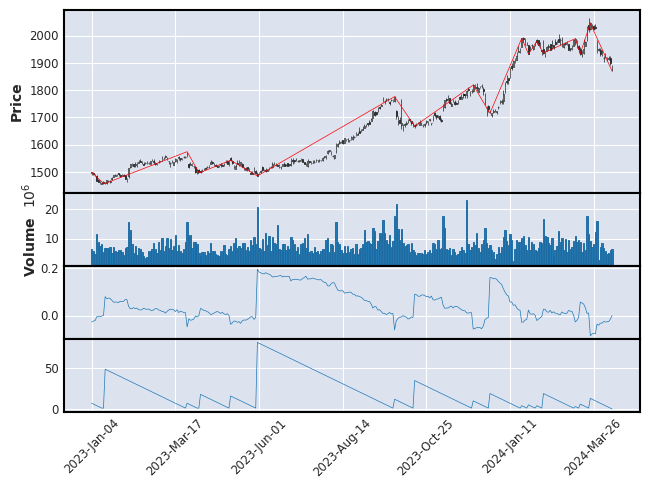

In [4]:
from screener.models.analyzer import Analyzer
from screener.repository.history import History
import mplfinance as mpf

h = History()
a = Analyzer(h.get_history(9434))

a.add_sma(5) \
    .add_zigzag(0.02)

df = a.df

series = [
    mpf.make_addplot(df['zigzag'], color='red', width=0.5),
    mpf.make_addplot(df['expected'], width=0.5, panel=2),
    mpf.make_addplot(df['period'], width=0.5, panel=3),
]


mpf.plot(df, type='candle', fontscale=0.7, addplot=series, volume=True)


